[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Jul 23 19:52:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
!pip install roboflow

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

## Custom Training

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="1rsgF9nvGMoRV0ycziva")
# project = rf.workspace("magisterka-nkle2").project("basketball-detection-kqhxt")
# dataset = project.version(8).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Basketball-detection-8 in yolov8:: 100%|██████████| 1702/1702 [00:00<00:00, 2124.76it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1rsgF9nvGMoRV0ycziva")
project = rf.workspace("magisterka-nkle2").project("basketball-detection-kqhxt")
dataset = project.version(10).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to Basketball-detection-10 in yolov8:: 100%|██████████| 5806/5806 [00:01<00:00, 2907.71it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1rsgF9nvGMoRV0ycziva")
project = rf.workspace("magisterka-nkle2").project("basketball-detection-kqhxt")
dataset = project.version(11).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to Basketball-detection-11 in yolov8:: 100%|██████████| 29074/29074 [00:09<00:00, 3134.59it/s]


Wejdz w tę komórkę poniżej, potem w runtime i "run before"

Wtedy wejdz w folder Basketball-detection-7 po lewej stronie, dwukrotnie kliknij na data.yaml i edytuj, żeby tak wyglądał:

names:
- ball
- basket
nc: 2
roboflow:
  license: CC BY 4.0
  project: basketball-detection-kqhxt
  url: https://universe.roboflow.com/magisterka-nkle2/basketball-detection-kqhxt/dataset/7
  version: 7
  workspace: magisterka-nkle2
test: ../test/images
train: /content/Basketball-detection-7/train/images
val: /content/Basketball-detection-7/valid/images



I jak to zrobisz to wejdz w ponisza komorkę i ją odpal

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

# Set the paths
drive_path_main = '/content/drive/MyDrive'

Mounted at /content/drive


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=/content/drive/MyDrive/yolo_bball_best.pt data=Basketball-detection-11/data.yaml epochs=250 plots=True device=0 patience=50

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/runs/detect/train3/weights/last.pt, data=Basketball-detection-11/data.yaml, epochs=250, patience=50, batch=16, imgsz=640, save=True, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fals

In [ ]:
import torch
BEST_MODEL = f"{HOME}/runs/detect/train3/weights/best.pt"
SAVE_PATH = os.path.join(drive_path_main, "yolo_bball_best_2.pt")
# Model class must be defined somewhere
model = torch.load(BEST_MODEL)
torch.save(model, SAVE_PATH)

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=Basketball-detection-10/data.yaml epochs=250 plots=True device=0 patience=25

In [ ]:
!yolo train resume model={HOME}/runs/detect/train3/weights/last.pt

WARNING ⚠️ 'data' is missing. Using default 'data=coco128.yaml'.
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/runs/detect/train3/weights/last.pt, data=Basketball-detection-10/data.yaml, epochs=250, patience=25, batch=16, imgsz=640, save=True, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, bo

In [ ]:
!ls Basketball-detection-10/

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml  weights


/content


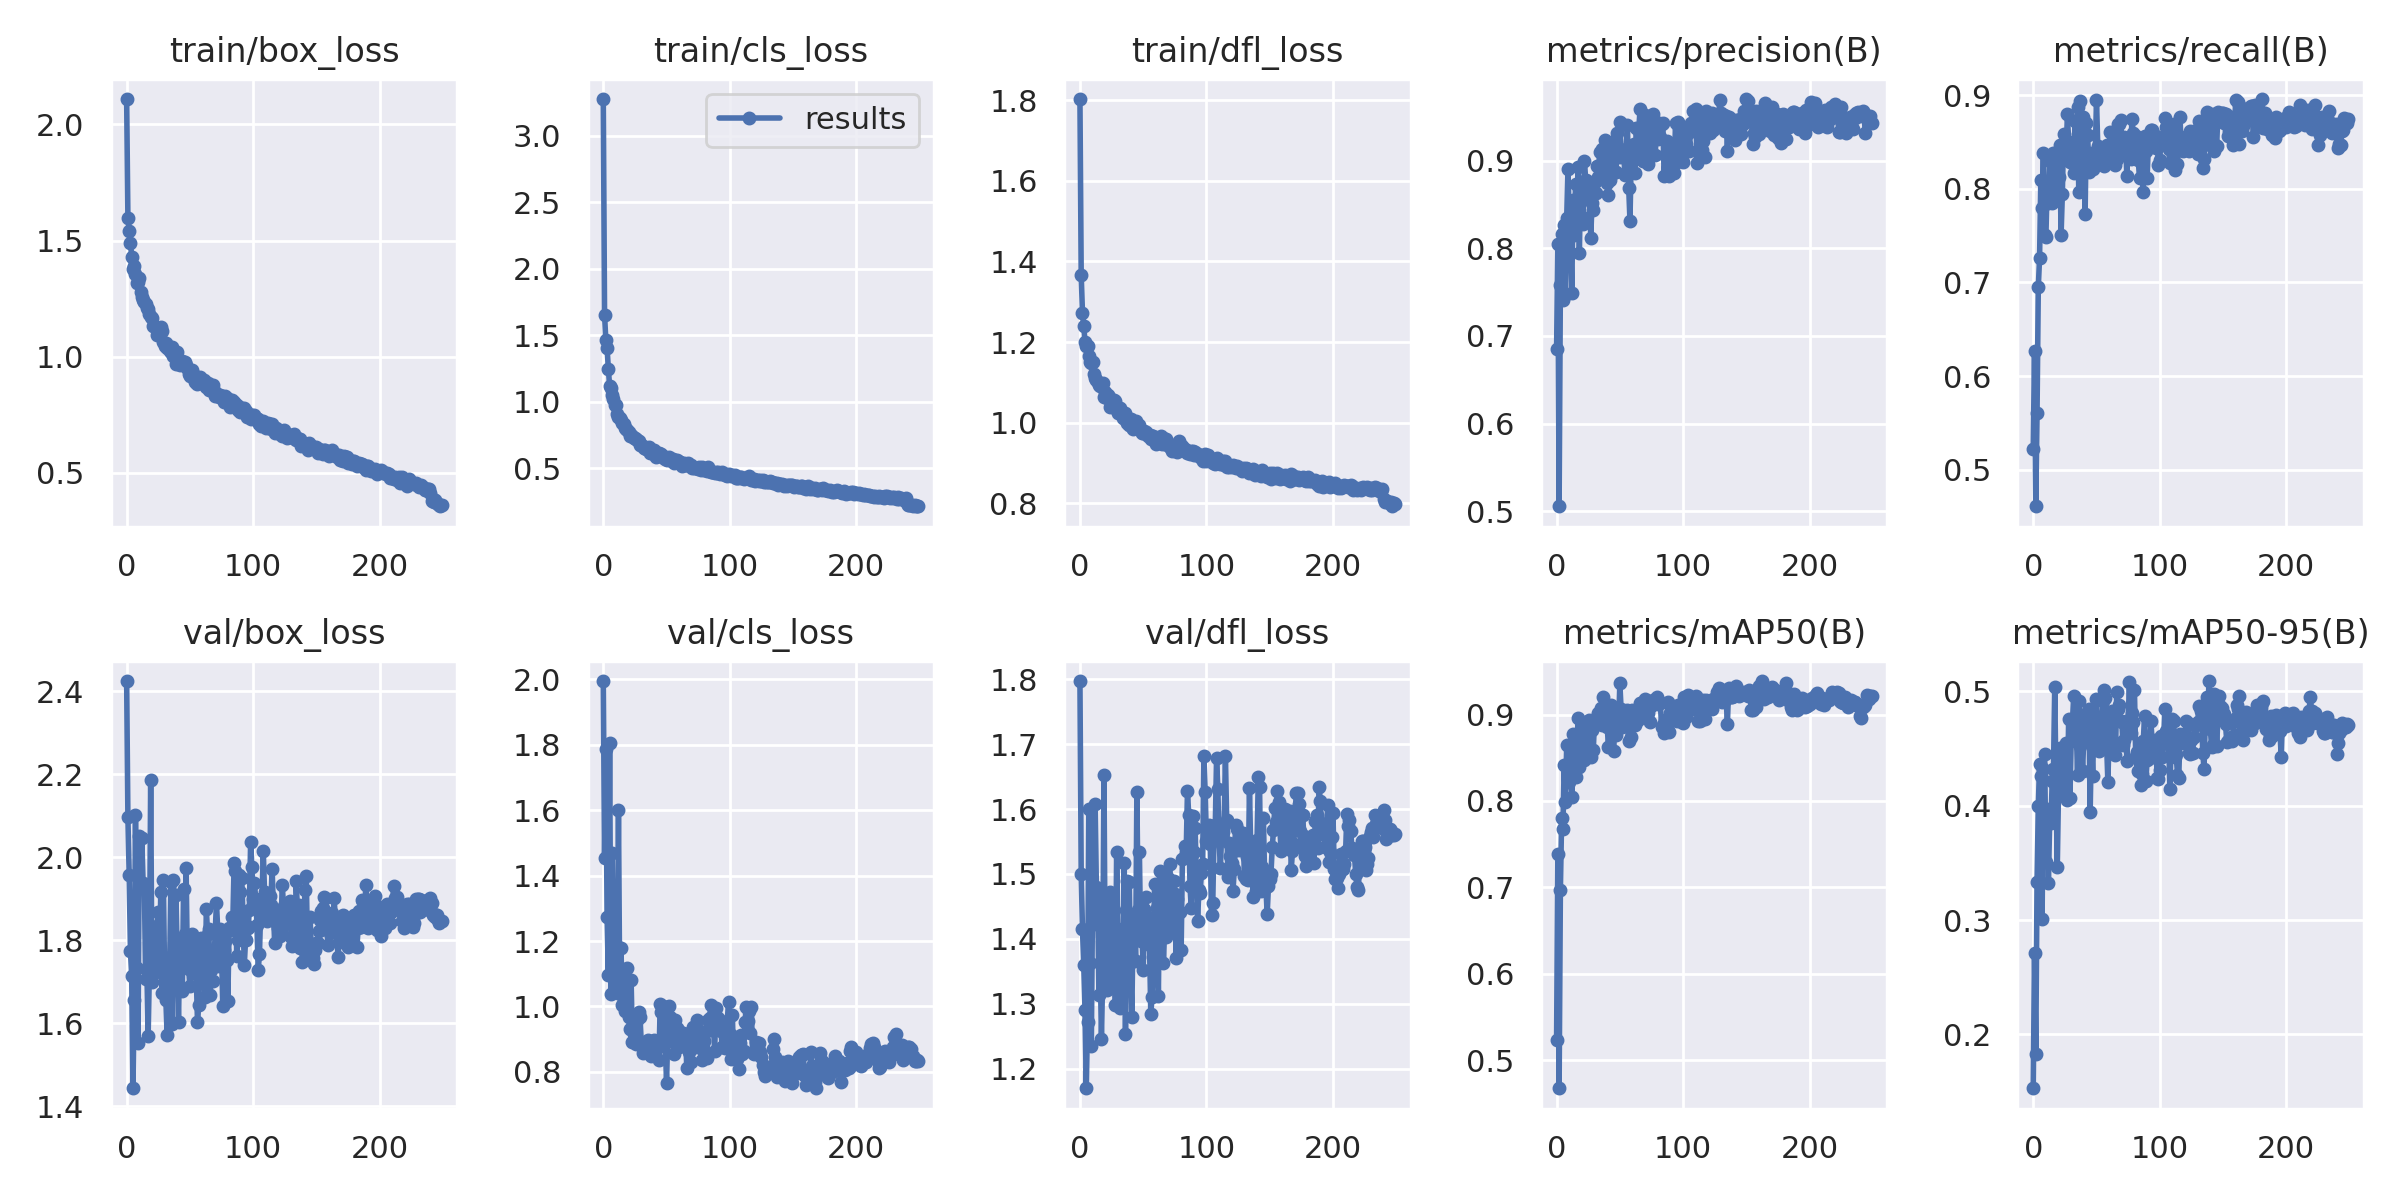

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


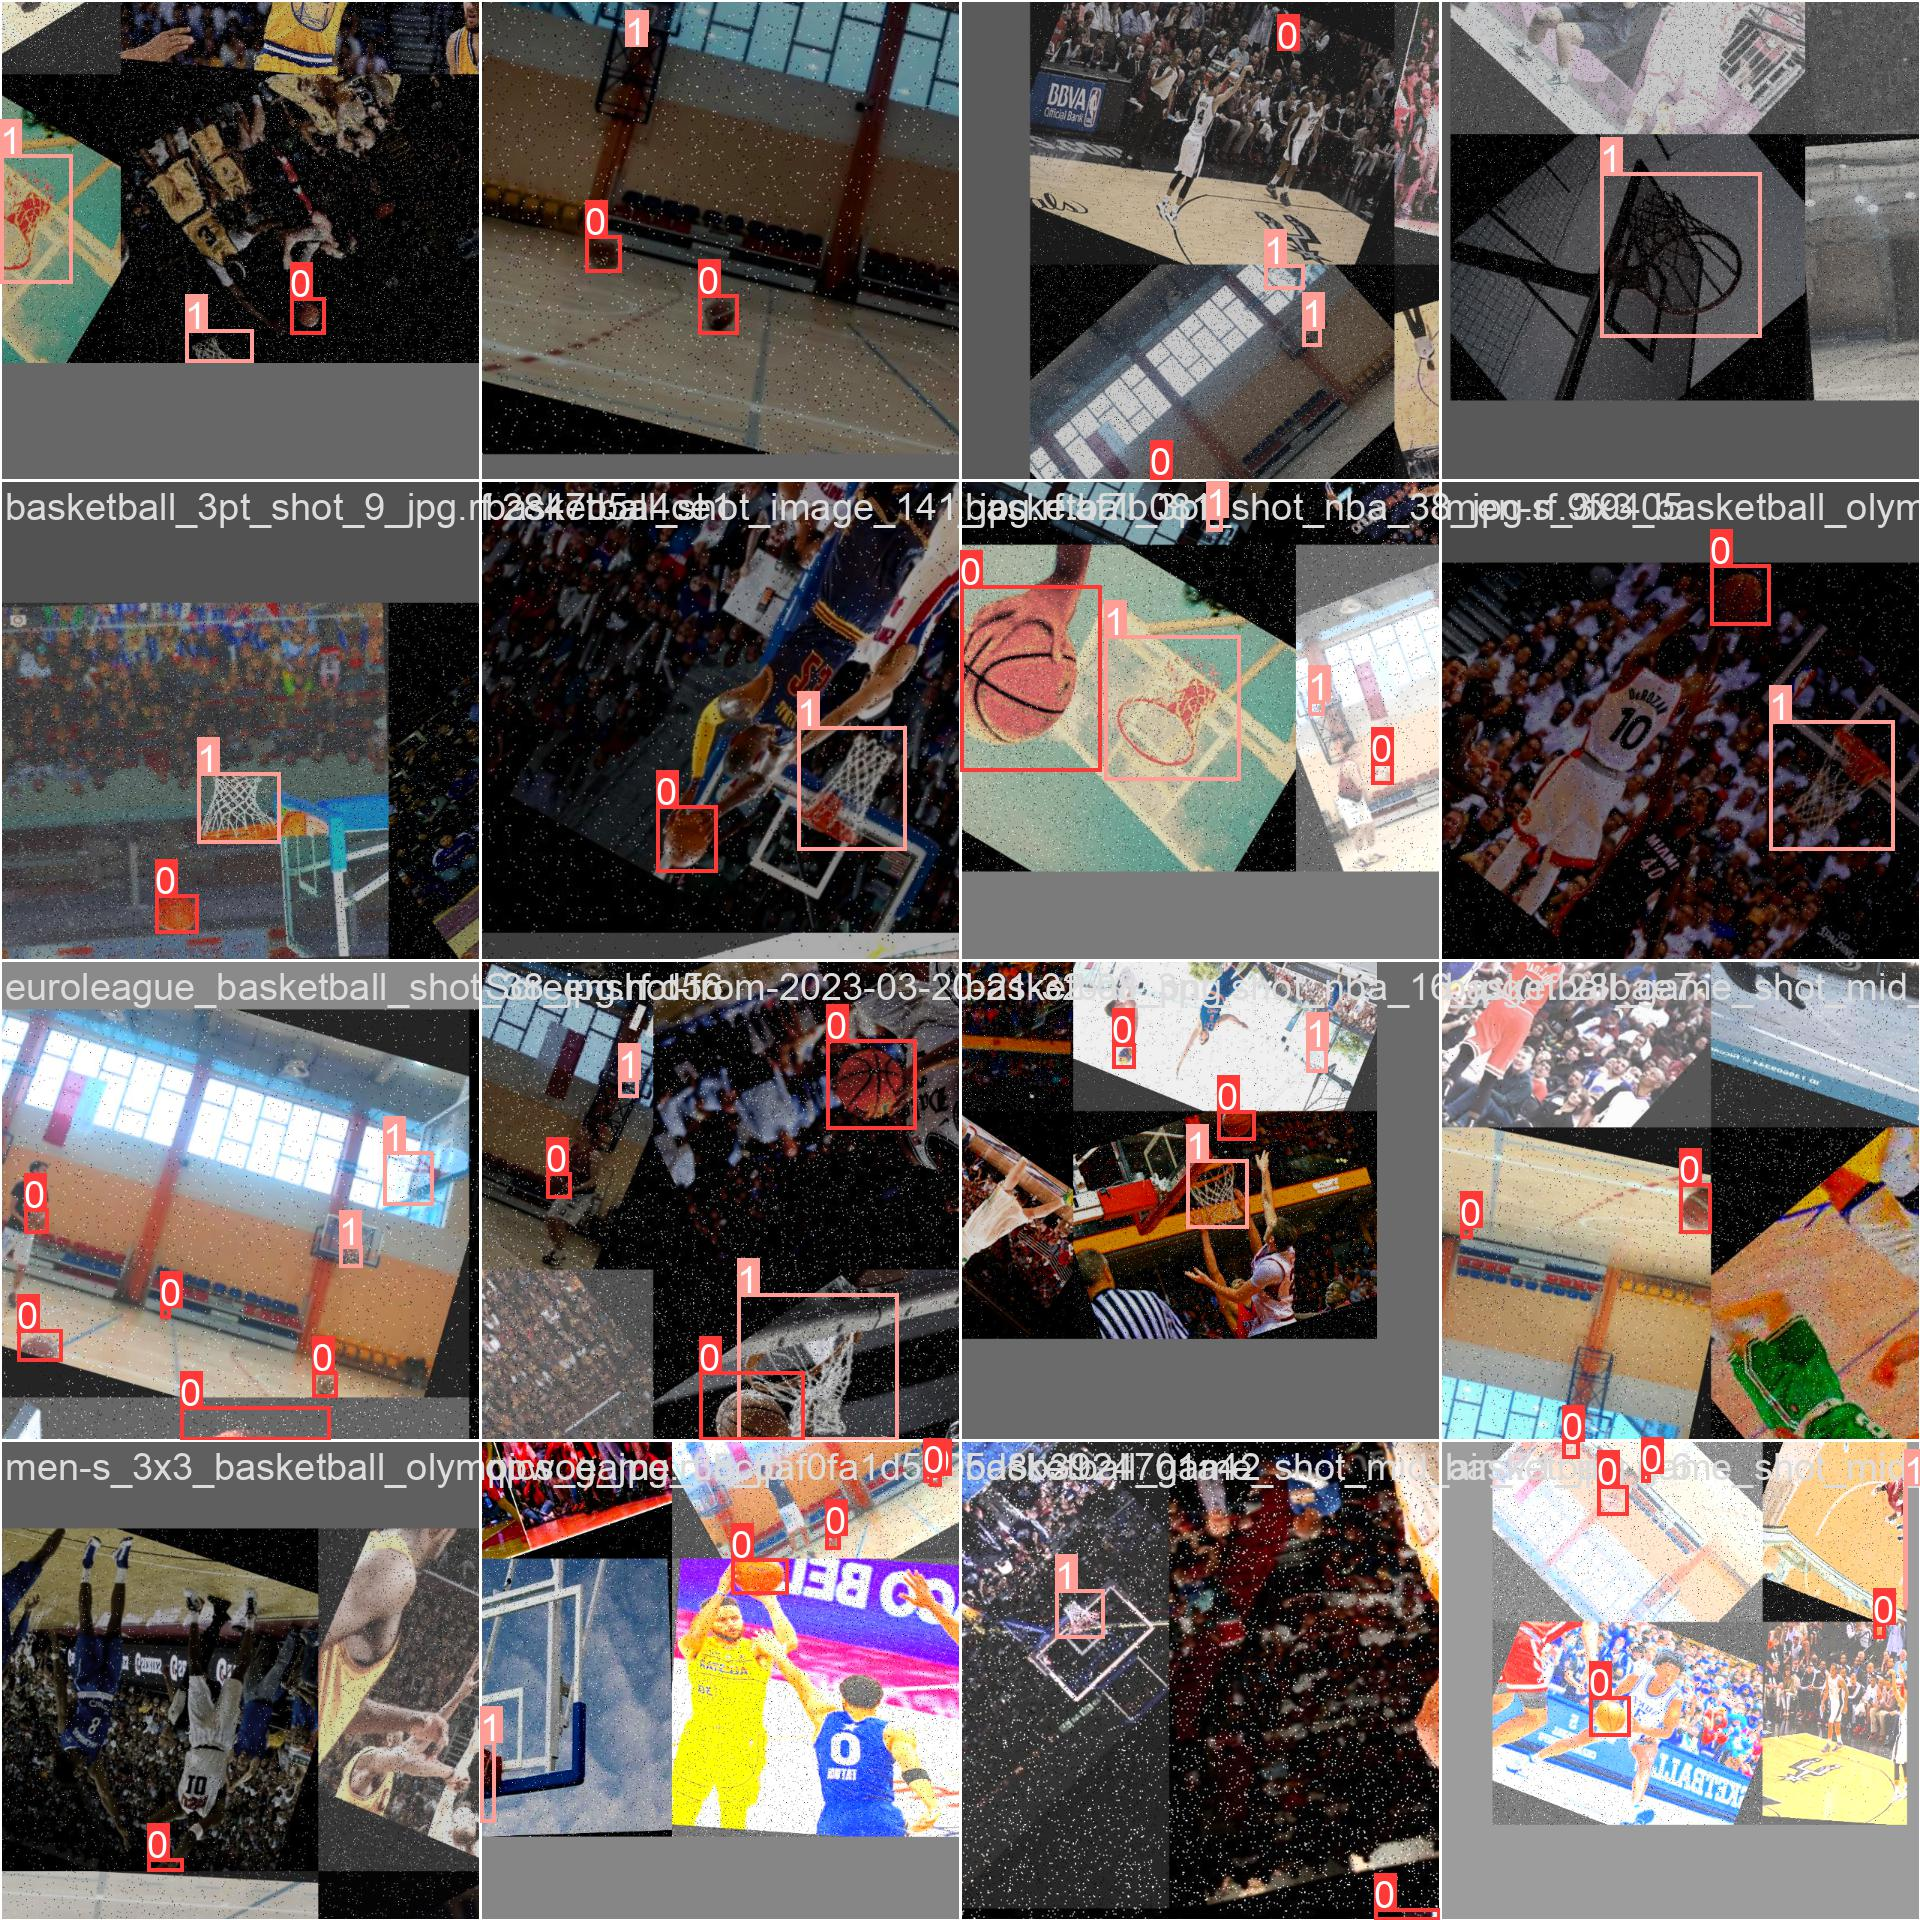

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/train_batch0.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Basketball-detection-8/valid/labels.cache... 101 images, 0 backgrounds, 0 corrupt: 100% 101/101 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:05<00:00,  1.36it/s]
                   all        101        201      0.946      0.867      0.921      0.509
                  ball        101        113      0.922      0.836      0.899      0.461
                basket        101         88       0.97      0.898      0.942      0.558
Speed: 4.5ms pre-process, 10.9ms inference, 0.0ms loss, 4.4ms post-process per image


## Inference with Custom Model

**NOTE:** Let's take a look at few results.

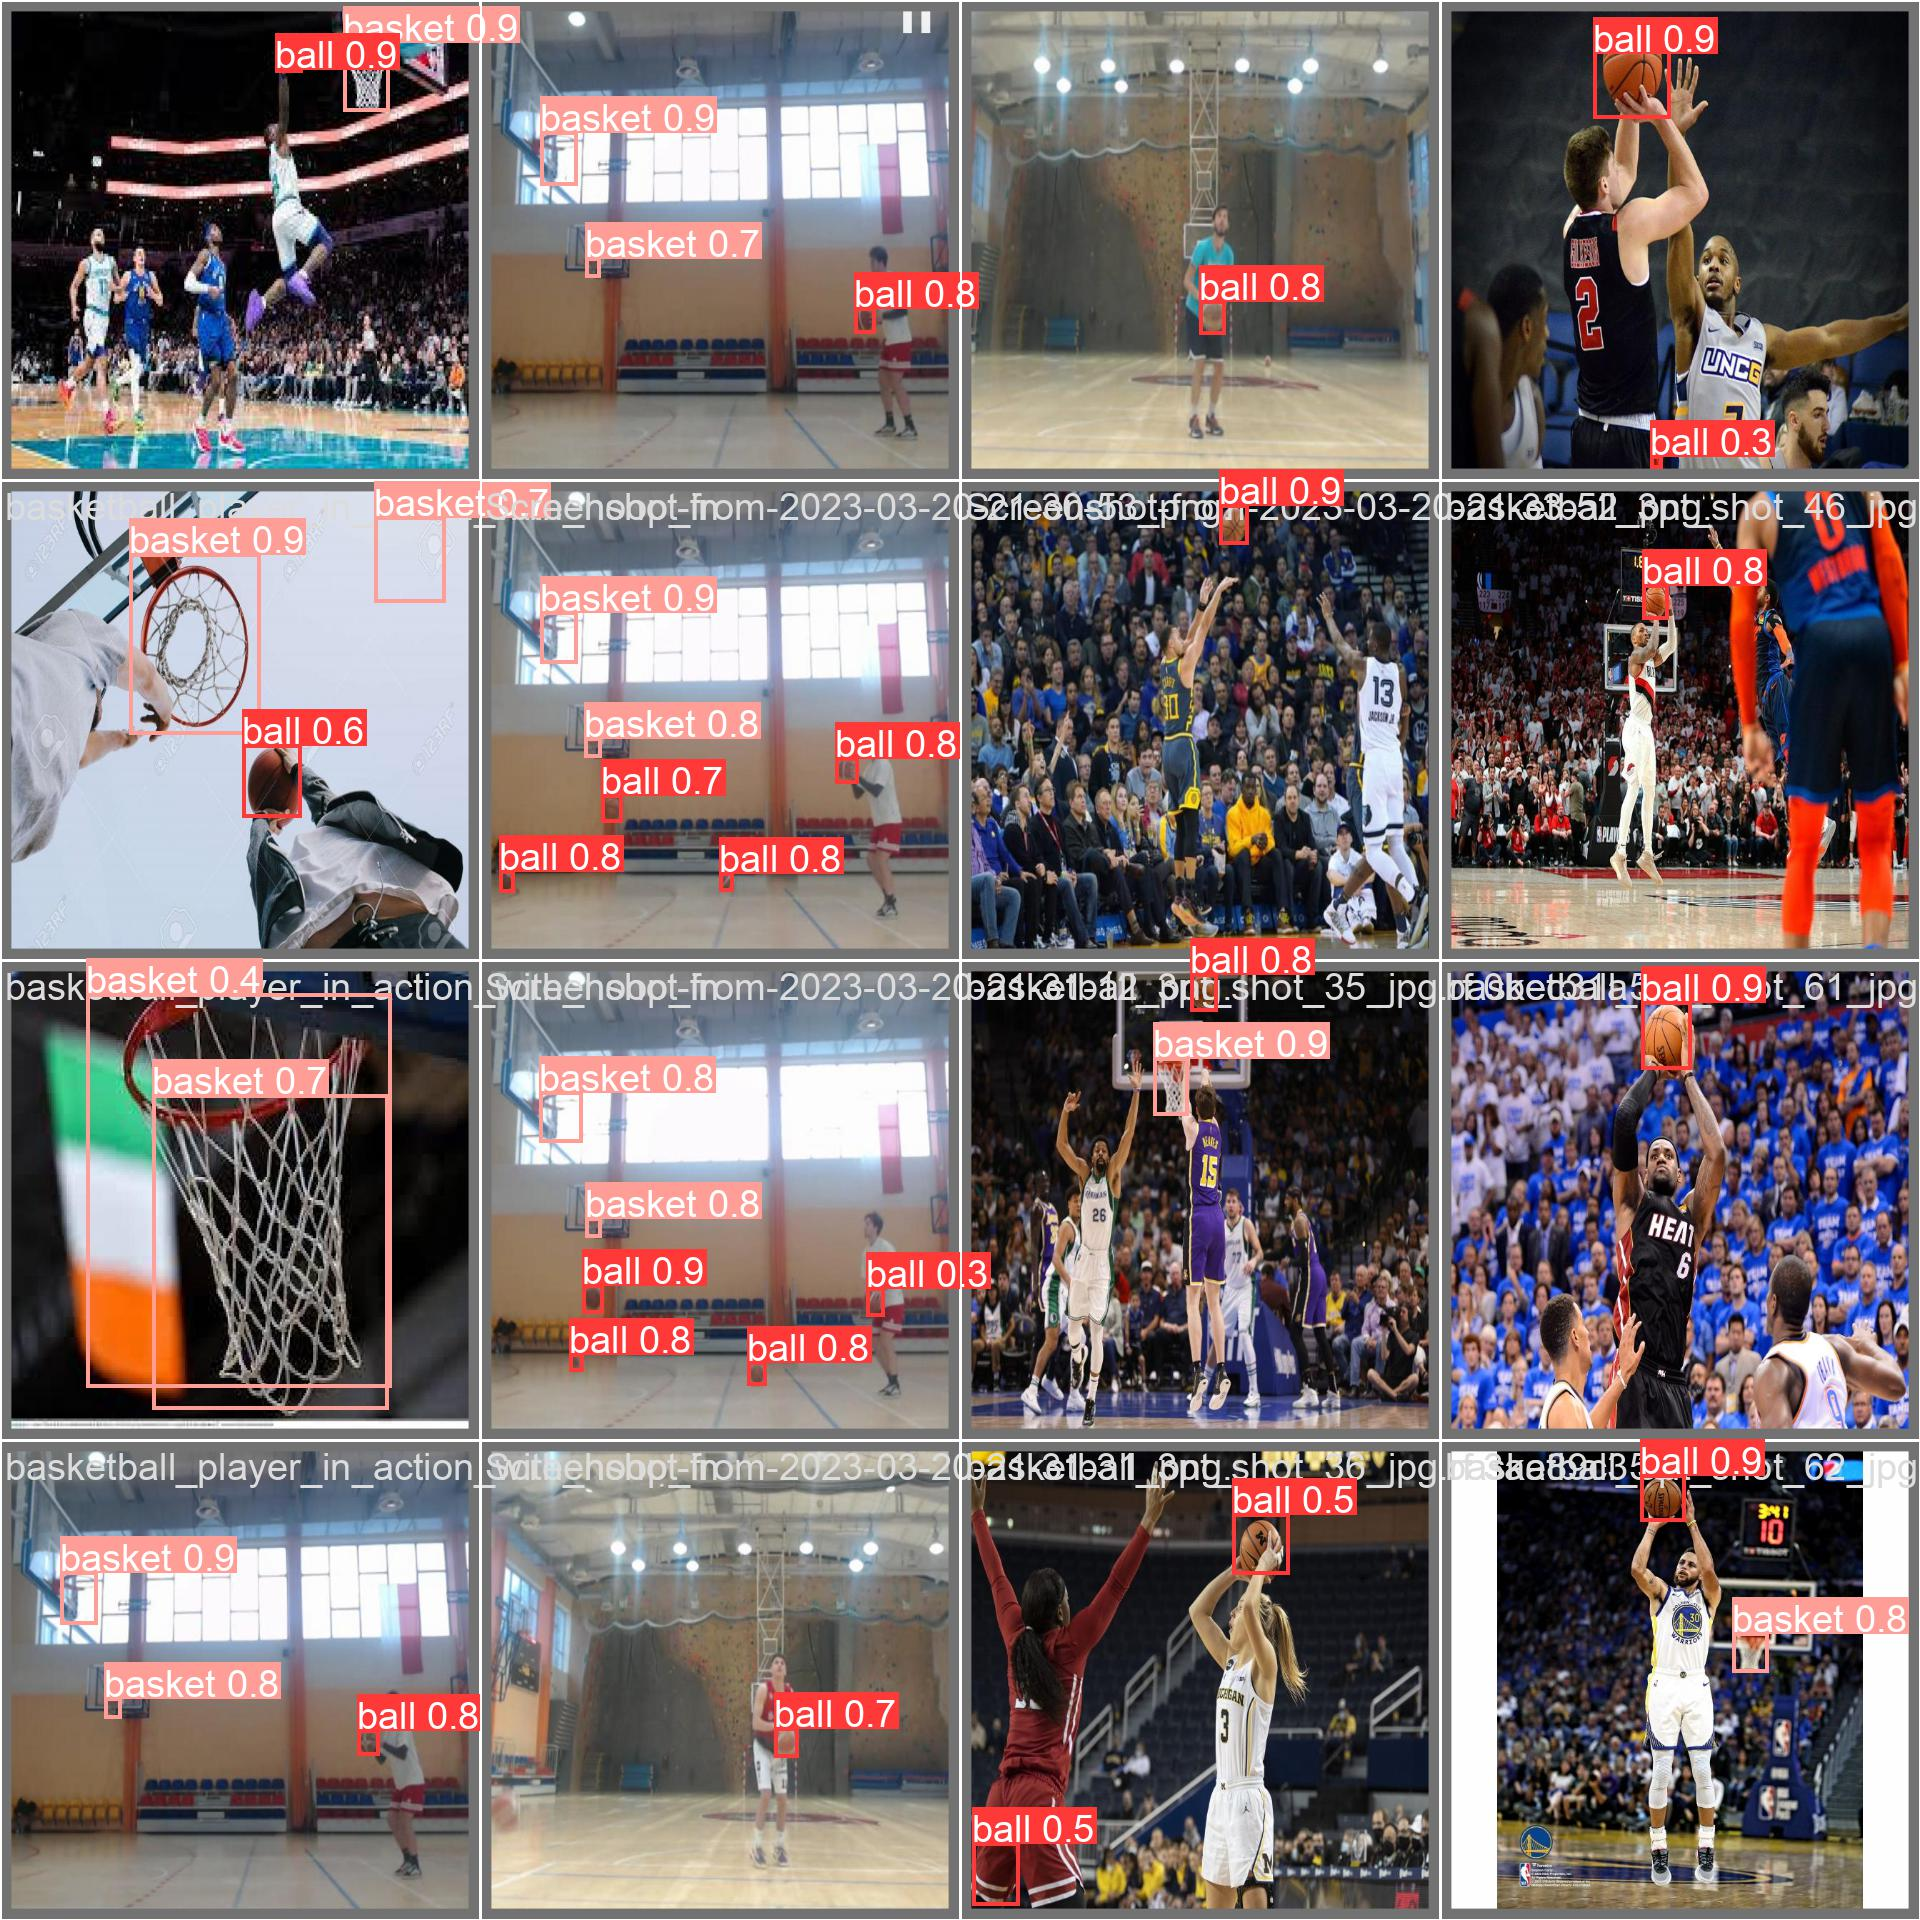

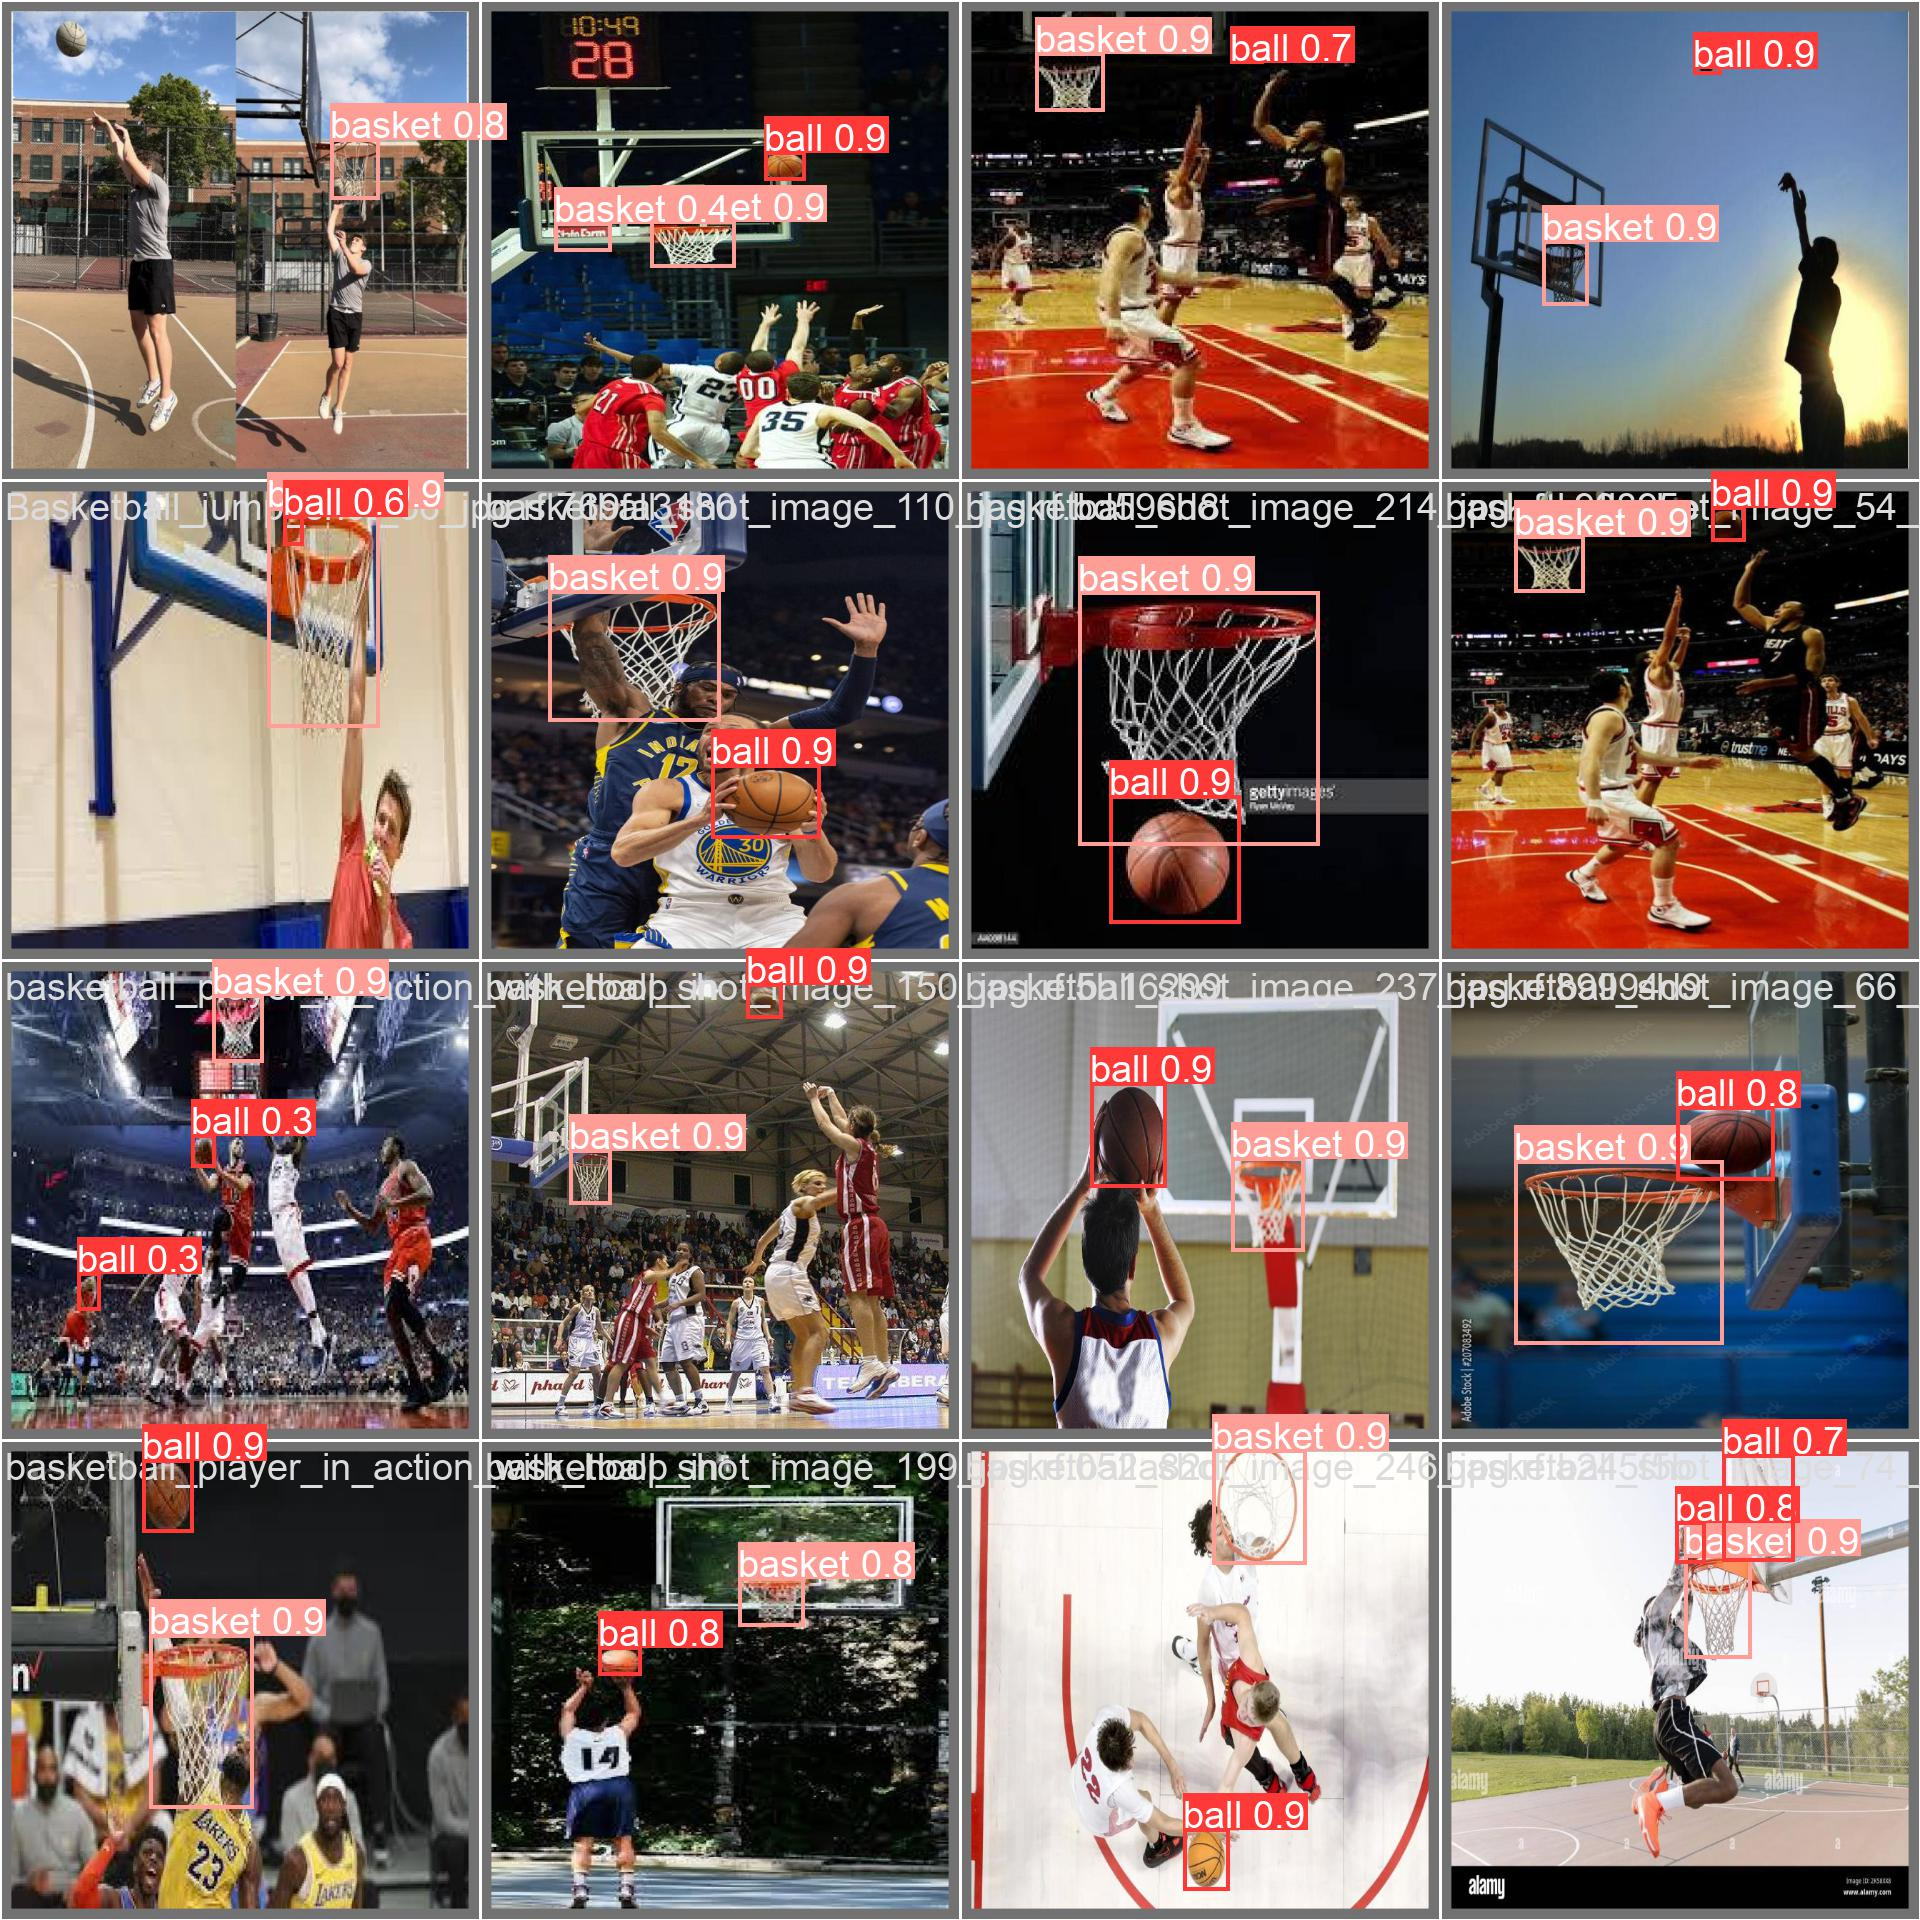

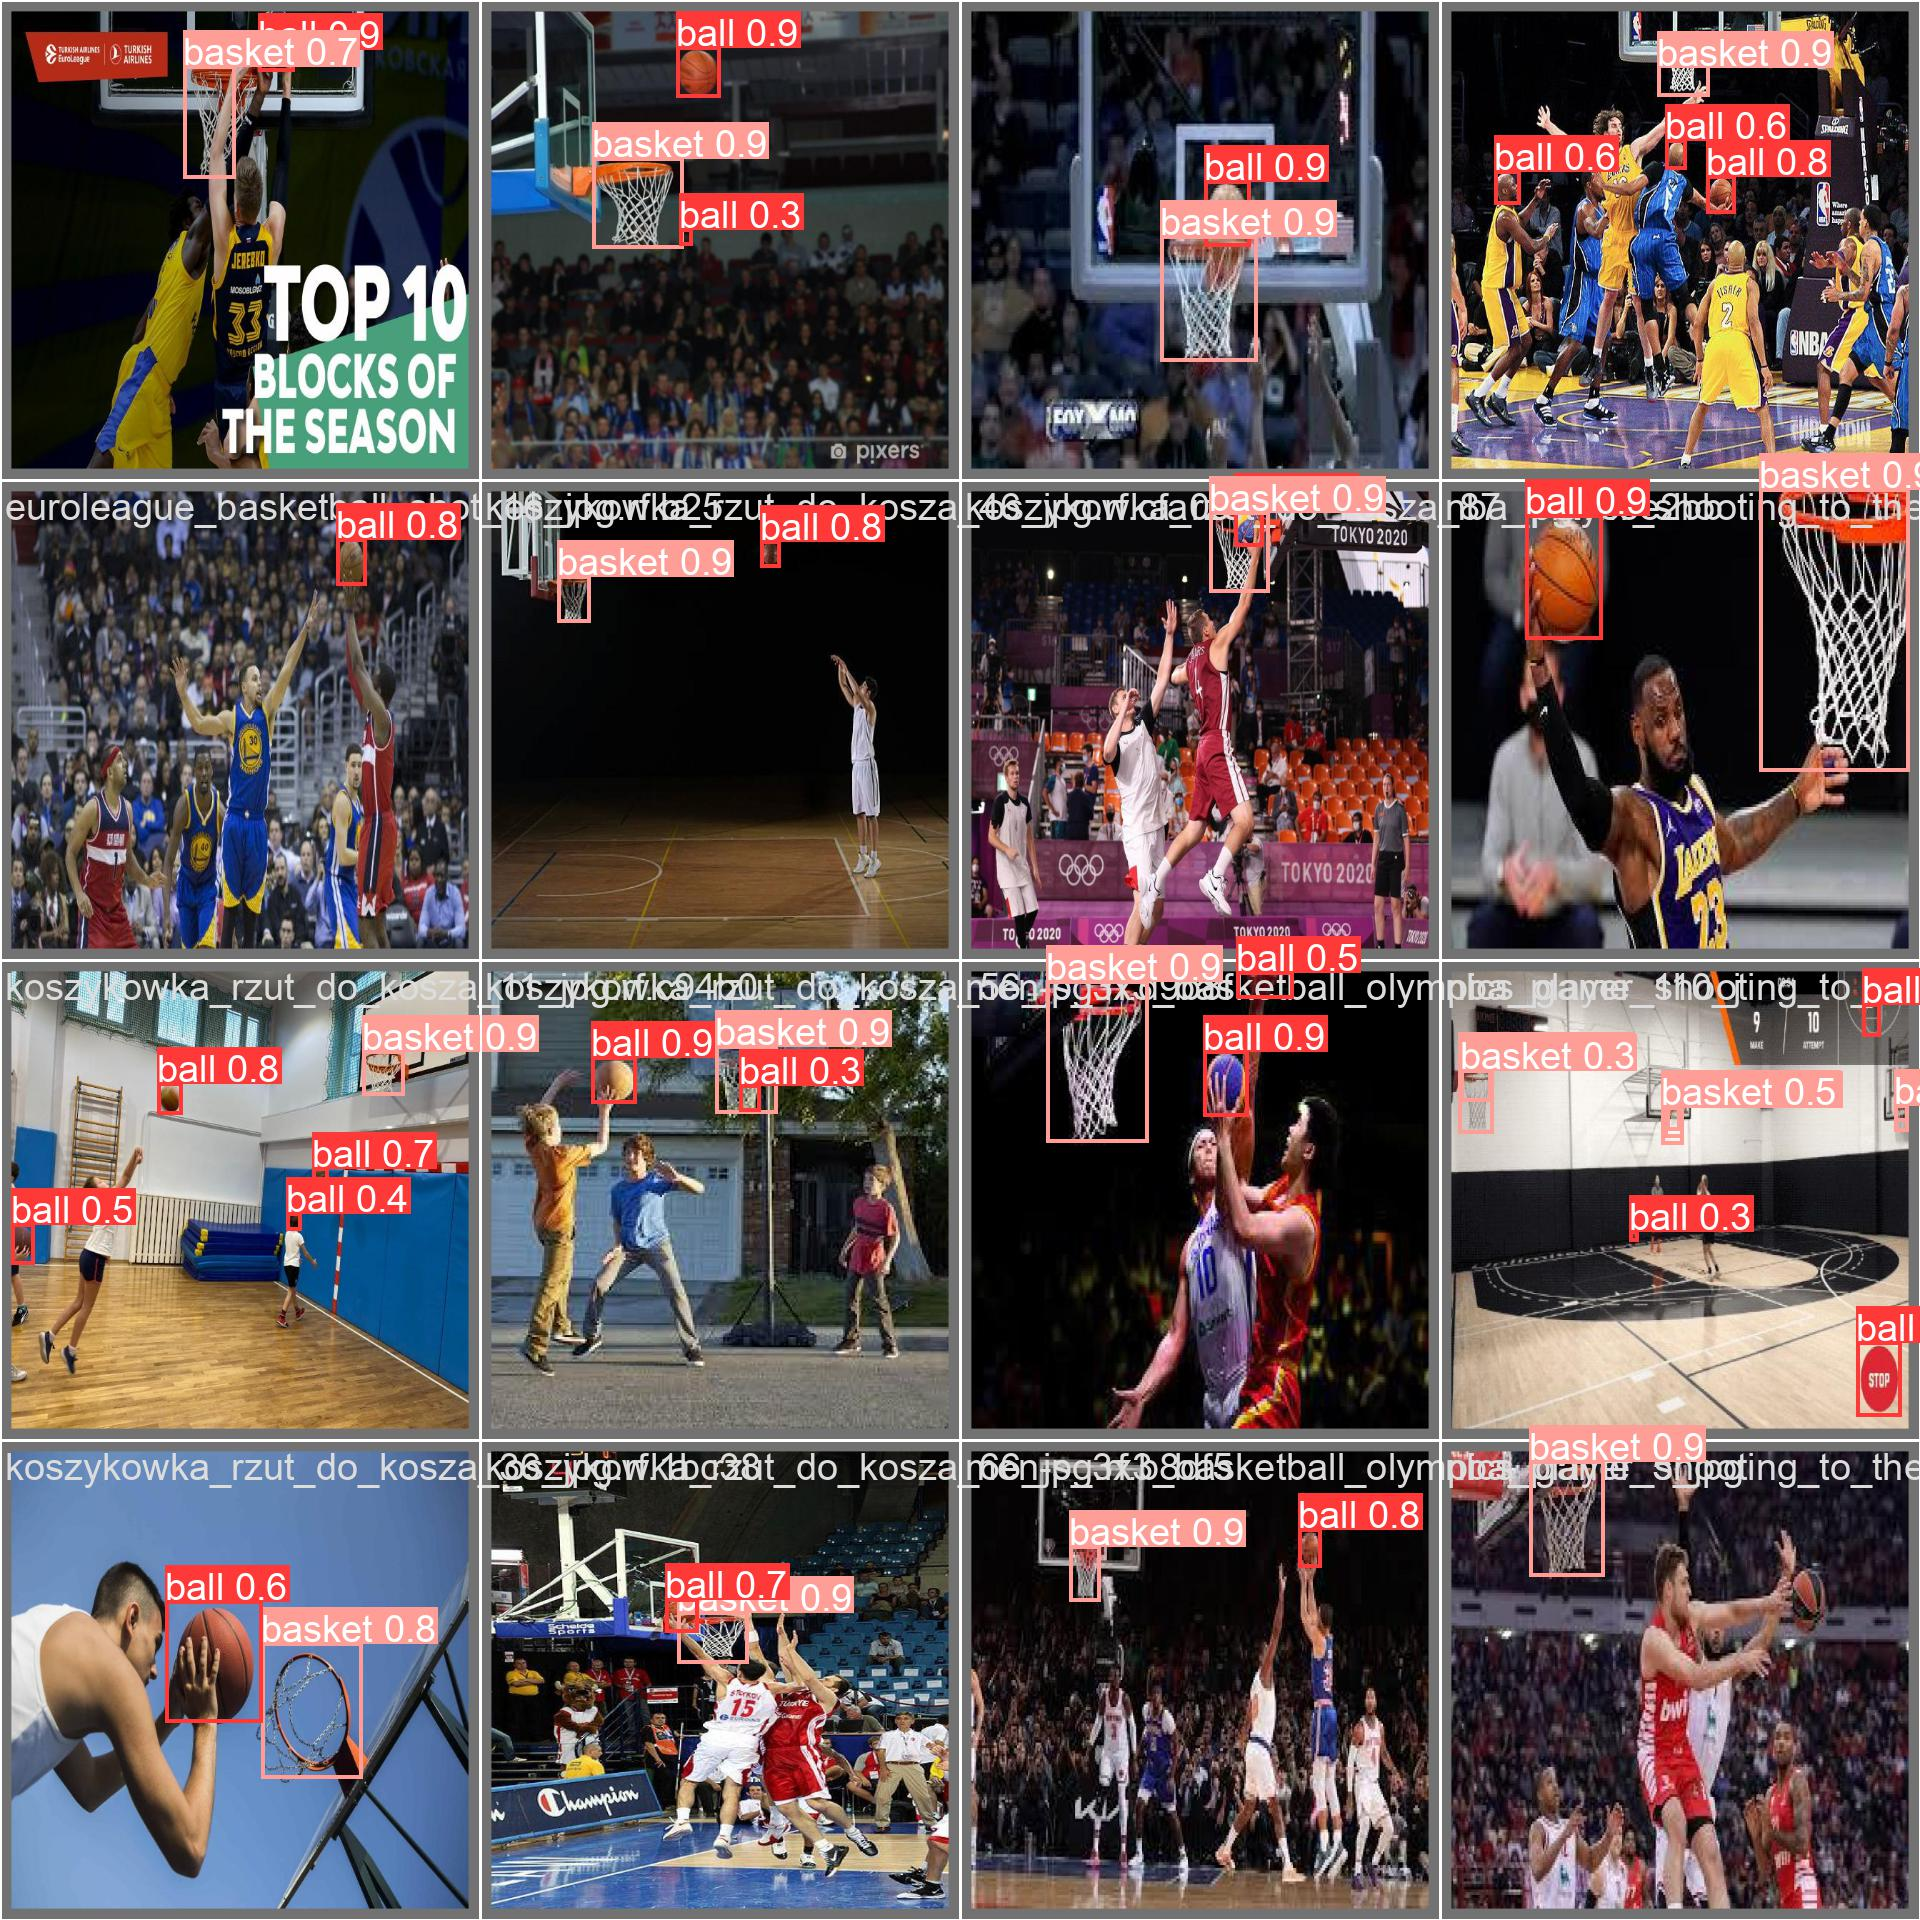

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/val/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.8/486.8 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 6.6 MB/s eta 0:00:00


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.